# Communities Dataset

First load the data and remove correlated features

saved


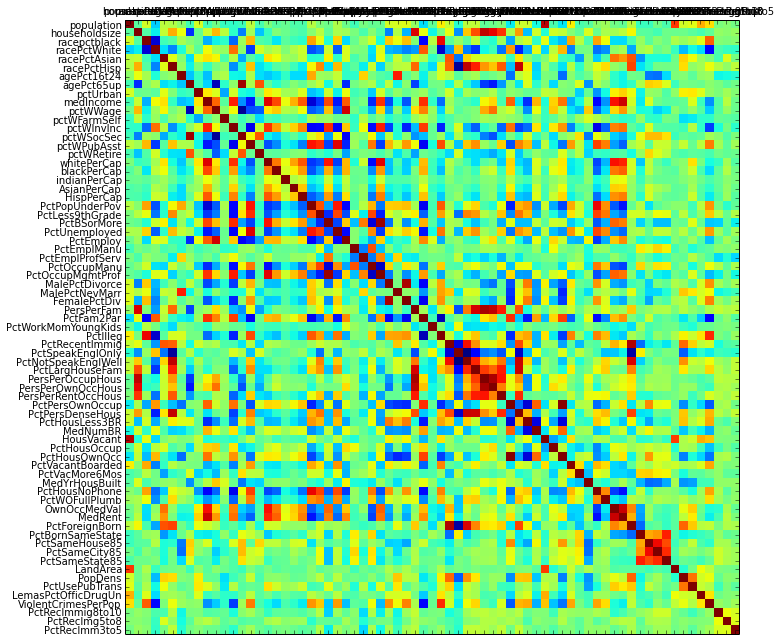

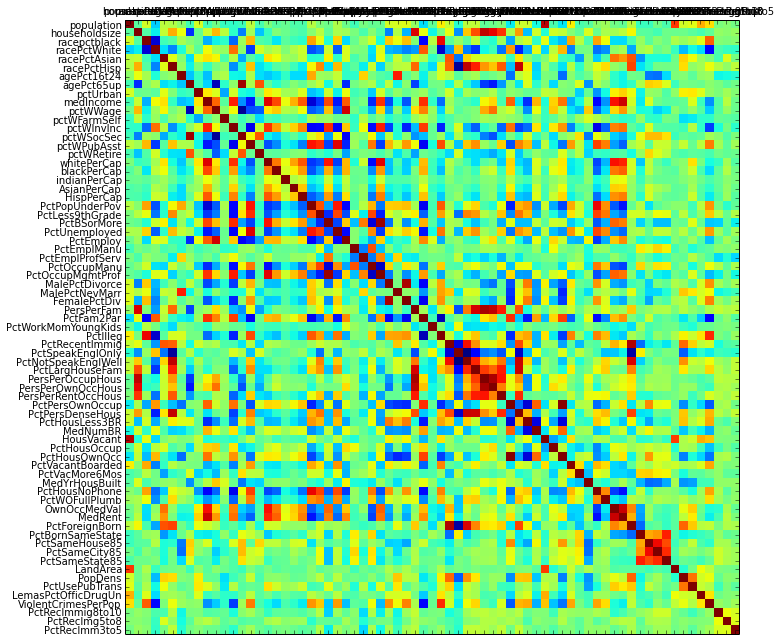

In [1]:
# this tells jupyter to plot inline instead of a separate window
%matplotlib inline

import Communities
import Stuff

data, features= Communities.load_data()
    
data= Communities.clean(data)

Stuff.plot_corr(data)

In [10]:
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct16t24,agePct65up,pctUrban,medIncome,...,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,PctRecImmig8to10,PctRecImg5to8,PctRecImm3to5
0,0.19,0.33,0.02,0.90,0.12,0.17,0.29,0.32,1.0,0.37,...,0.06,0.04,0.9,0.5,0.32,0.14,0.20,0.00,0.01,0.00
1,0.00,0.16,0.12,0.74,0.45,0.07,0.35,0.27,1.0,0.31,...,?,?,?,?,0.00,?,0.67,-0.02,-0.02,0.02
2,0.00,0.42,0.49,0.56,0.17,0.04,0.28,0.32,0.0,0.30,...,?,?,?,?,0.00,?,0.43,0.01,0.02,0.00
3,0.04,0.77,1.00,0.08,0.12,0.10,0.34,0.21,1.0,0.58,...,?,?,?,?,0.00,?,0.12,0.00,0.03,0.03
4,0.01,0.55,0.02,0.95,0.09,0.05,0.23,0.36,0.9,0.50,...,?,?,?,?,0.00,?,0.03,0.01,0.02,0.01


In [9]:
data.shape

(1994, 105)

In [2]:
from Search import Search
from sklearn.neighbors import KNeighborsRegressor

data= data.where(data != "?", None)
data= data.dropna()
    
y= data['ViolentCrimesPerPop']
del(data['ViolentCrimesPerPop'])
X= data

parameters= {'n_neighbors' : range(4, 8), 'weights':['uniform', 'distance'],  'p':[1, 2]}
h= Search(X, y, KNeighborsRegressor(), parameters)
h.run()
h.reportTable()

,p,n_neighbors,weights,mean_fit,sd_fit,mean_predict,sd_predict,mean_rmse,sd_rmse
0,1,4,distance,0.002475,0.000103,0.002466,0.000132,0.033091,0.005686
1,1,4,uniform,0.002444,0.000090,0.002405,0.000130,0.033191,0.005699
2,2,4,distance,0.002437,0.000090,0.002409,0.000110,0.033273,0.006248
3,2,4,uniform,0.002441,0.000083,0.002409,0.000106,0.033337,0.006540
4,1,5,distance,0.002429,0.000079,0.002400,0.000097,0.033196,0.006481
5,1,5,uniform,0.002440,0.000102,0.002410,0.000107,0.033168,0.006461
6,2,5,distance,0.002438,0.000097,0.002409,0.000100,0.033119,0.006637
7,2,5,uniform,0.002436,0.000092,0.002408,0.000095,0.033116,0.006783
8,1,6,distance,0.002434,0.000089,0.002409,0.000095,0.033114,0.006694
9,1,6,uniform,0.002429,0.000086,0.002403,0.000093,0.033166,0.006631
